In [9]:
%matplotlib widget

In [10]:
import numpy as np
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import axes3d
import matplotlib.cm as cm
from IPython.display import display, Math, clear_output

import sympy 
from sympy import *
from sympy.physics.vector import ReferenceFrame, CoordinateSym
from sympy.vector import CoordSys3D, divergence, curl

import ipyvolume as ipv
import time
from ipywidgets import Output, interact
import ipywidgets as widgets
np.seterr(divide='ignore', invalid='ignore')
init_printing()

## Coaxial Cable Challenge: 
* We will try to develop a coaxial cable that is perfect for our application. In the process we may discover that perfect depends on the context. 

### Coaxial Cable Design 
A coaxial cable consists of 
* Two conductors:
    1. A centre core solid internal cylinder which "carries the signal". 
    2. A metallic child hollow outer cylinder which is held at ground potential. 
* A dielectric insulator between the two conductors.

<img src="img/Coaxial_cable_cutaway.svg" width="680" height="680" align="center"/>

By Tkgd2007 - Own work, CC BY 3.0, https://commons.wikimedia.org/w/index.php?curid=4138900

***
### There are **three critical parameters** of the cable that we will use our electromagnetism skills to study. 
1. The **capacitance**: $ C = \dfrac{Q}{V}$ which relates the amount of charge needed on the centre core to charge it to a certain voltage. 
2. The **inductance**: $ L = \dfrac{V_{drop}}{(\dfrac{dI}{dt})}$
3. And the **resistance**.


* The voltage $V$ in the capacitance expression is the voltage of the centre core with respect to ground. 
* The voltage $V_{drop}$ is the voltage difference between two segments of the centre core that is induced by a time change of current.

Referring to Griffiths problem 2.43 find the capacitance per unit length of two coaxial cylindrical tubes:

<img src="img/Griffiths_2p43.png" width="680" height="680" align="center"/>

## Solve for the Capacitance
#### Step 1: ** Find the E-Field ** (use cylindrical coordinates):

$\int \mathbf{E}\cdot{\mathbf{dA}} = \dfrac{Q_{enc}}{\epsilon}$
By symmetry the E-field is parallel to the normal vector of the cylindrical surface (assume $Q$ charge over a length of $L$). 

So: $E(2\pi s*L) = \dfrac{Q}{\epsilon} \Rightarrow$ $\mathbf{E} = \dfrac{Q}{2\pi s L  \epsilon} \hat{\mathbf{s}} $

#### Step 2: Find the potential. Capacitance depends on the voltage so let's find the potential between the inner and outer cylinders. 

$-\int_a^b \mathbf{E}\cdot \mathbf{dl} = V(b) - V(a) = -\dfrac{Q}{2\pi L  \epsilon} \int_a^b \dfrac{ds}{s} \Rightarrow$

$ V(a) - V(b) = \dfrac{Q}{2\pi L  \epsilon} \ln{\left(\dfrac{b}{a} \right)} $

Capacitance ($C$) per unit length ($l$):
$ \dfrac{C}{l} = \dfrac{Q}{V} \dfrac{1}{l} \Rightarrow \dfrac{C}{l} = \dfrac{2 \pi \epsilon}{\ln{\left(\dfrac{b}{a} \right)}} $

## Solve for the Inductance
#### Step 1: ** Find the B-Field within the cable ** (use cylindrical coordinates and an Amperian Loop):

$\oint \mathbf{B}\cdot{\mathbf{dl}} = \mu I$
By symmetry the E-field is parallel to the circular Amperian loop of radius $r$.
$B(2\pi r) = \mu I$

So: $\mathbf{B} = \dfrac{\mu I}{2 \pi r} \hat{\mathbf{\phi}} $

#### Step 2: Find the magnetic flux through a loop between the two conductors. 

$\Phi = \int \mathbf{B}\cdot \mathbf{dA} = \int_{r=a}^{r=b} \dfrac{\mu I}{2 \pi r} l dr = \dfrac{\mu I}{2 \pi} l \ln{\left(\dfrac{b}{a} \right)}$

Inductance ($L$) per unit length ($l$):
$ V_{drop} = \dfrac{d\Phi}{dt} = L \dfrac{dI}{dt} $ 

$ \dfrac{d\Phi}{dt} = \dfrac{\mu}{2 \pi} l \ln{\left(\dfrac{b}{a} \right) \dfrac{dI}{dt}}$

$ \dfrac{L}{l} = \dfrac{\mu}{2 \pi} \ln{\left(\dfrac{b}{a} \right)}$

## Plot the Capacitance and Inductance Versus the inner diameter. Use:
1. a slider to adjust the outer diameter and 
2. a drop down box to adjust the  dielectric.

In [11]:
plt.close('all')
a = np.linspace(0.05, 2, 1000) # inner radius [in mm]

fig = plt.figure(figsize = (11,8))

# constants and equation for capacitance
e0 = 8.85e-12
b = 3
cap = 2*np.pi*e0/np.log(b/a)*1e12
dielectrics = {'air': 1, 'polyethylene': 2.25, 'teflon_PTFE': 2.1}

# plot capacitance 
ax1 = fig.add_subplot(1, 2, 1)
line, = ax1.plot(a, cap)
ax1.set_ylim([0, np.max(cap[np.isfinite(cap)])*1.1])
# label plot
ax1.set_title('Capacitance')
plt.ylabel('C [pF/m]')
plt.xlabel('a:inner diameter [mm]')
ax1.grid(True)

# constants and equation for inducatance
u0 = 4*np.pi*1e-7
ind = u0/(2*np.pi)*np.log(b/a)*1e9

ax2 = fig.add_subplot(1, 2, 2)
line2, = ax2.plot(a, ind)
ax2.set_ylim([0, np.max(ind[np.isfinite(ind)])*1.1])

# label plot
ax2.set_title('Inductance')
plt.ylabel('L [nH/m]')
plt.xlabel('a:inner diameter [mm]')
ax2.grid(True)

def update(b=widgets.FloatSlider(min=0.0,max=100.0,step=0.1,value=5), 
           dielectric = ['air', 'polyethylene', 'teflon_PTFE']):
    
    # capacitance 
    er = dielectrics[dielectric]
    cap = 2*np.pi*e0*er/np.log(b/a)*1e12
    
    # find negative values
    idx = cap<0
    line.set_ydata(cap)
    line.set_marker('*')
    fig.canvas.draw()
    ax1.set_ylim([0, np.max([np.max(cap[np.isfinite(cap)])*1.1, 0.5])])
    
    # inductance 
    ind = u0/(2*np.pi)*np.log(b/a)*1e9
    
    # remove any negative values
    idx = ind<0
    line2.set_ydata(ind)
    line2.set_marker('*')
    fig.canvas.draw()
    ax2.set_ylim([0, np.max([np.max(ind[np.isfinite(ind)])*1.1, 0.5])])

interact(update);

A Jupyter Widget

A Jupyter Widget

## Plot the Resistance Versus the inner diameter (no slider needed in this case).

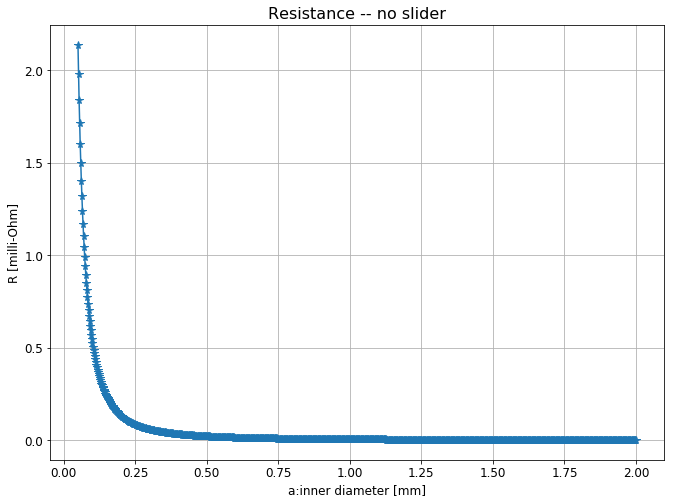

In [4]:
a = np.linspace(0, 2, 1000) # inner radius [in mm]
fig = plt.figure(figsize = (11,8))
ax1 = fig.add_subplot(1, 1, 1)
ax1.set_title('Resistance -- no slider')
plt.ylabel('R [milli-Ohm]')
plt.xlabel('a:inner diameter [mm]')

# resistance 
a = np.linspace(0.05, 2, 1000) # inner radius [in mm]
rho = 1.68e-8  # Ohm * m 
data = rho/(np.pi * (a*1e-3)**2) 
line, = ax1.plot(a, data)
line.set_marker('*')
plt.grid(True)

In [5]:
plt.close('all')